# Insights from Failed Orders

## Assignment

1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignments, and reasons for order rejection. Analyze the resulting plot. Which category has the highest number of orders?
2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?
3. PLot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?
4. Plot the distribution of average ETA by hours. How can this plot be explained?
5. **BONUS** Hexagons. Using the h3 and folium packages, calculate how many sizes 8 hexes contain 80% of all orders from the original data sets and visualize the hexes, coloring them by the number of fails on the map.

## Read and Explore the Datasets

In [1]:
import pandas as pd
orders = pd.read_csv(filepath_or_buffer='Data/data_orders.csv')

# rows, columns
orders.shape

(10716, 8)

In [3]:
# the random_state arguments ensures that we get the same sample
# each time we call the method with the same arguments
orders.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [4]:
offers = pd.read_csv(filepath_or_buffer='Data/data_offers.csv')

offers.shape

(334363, 2)

In [5]:
offers.sample(n=10, random_state=42)

,order_gk,offer_id
244971,3000627481054,300052086404
236783,3000631282042,300052342376
22714,3000624367715,300051909011
306983,3000557436646,300050769980
170256,3000588131807,300051201442
316173,3000629756224,300052250019
234398,3000625018320,300051967737
122107,3000629082264,300052196687
60909,3000588606991,300051225443
52998,3000629981908,300052274857


In [6]:
# merge the DataFrames
df = orders.merge(right=offers, how='inner', on='order_gk')

df.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [7]:
import numpy as np
df['is_driver_assigned'] = np.where(df['is_driver_assigned_key'] == 1, 'Yes', 'No')
df['order_status'] = np.where(df['order_status_key'] == 4, 'Cliennt Cancelled', 'System Reject')

df.drop(columns=['is_driver_assigned_key', 'order_status_key'], inplace=True)

df = df.rename(columns={
    'order_datetime' : 'order_time'
})

df.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Cliennt Cancelled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Cliennt Cancelled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Cliennt Cancelled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Cliennt Cancelled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Cliennt Cancelled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Cliennt Cancelled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Cliennt Cancelled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Cliennt Cancelled


## Question 1
**Build up a distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyze the resulting plot. Which category has the highest number of orders?**

In [8]:
df.groupby(by=['is_driver_assigned', 'order_status'])['order_gk'].count()

is_driver_assigned  order_status     
No                  Cliennt Cancelled    13435
                    System Reject         9469
Yes                 Cliennt Cancelled     8360
                    System Reject            4
Name: order_gk, dtype: int64

We see a high number of orders canceled before a driver is assigned, implying that maybe customers have waited too long and decided on an alternative for their transportation needs. 

We have 13435 orders canceled by the client, and 9469 rejected by the system. 

There are 8360 client cancellations after driver has been assigned, and only 4 which were rejected by the system.

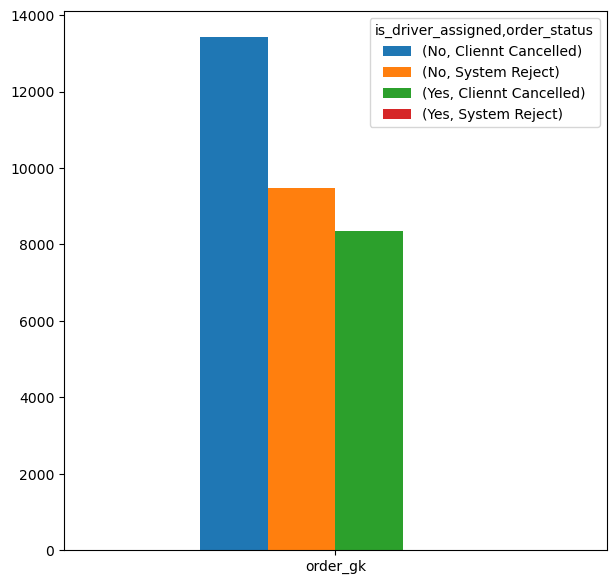

In [9]:
df_q1 = df.pivot_table(columns=['is_driver_assigned', 'order_status'], values='order_gk', aggfunc='count')
_ = df_q1.plot(kind='bar', subplots=False, figsize=(7, 7), legend=True, rot=0)